<a href="https://colab.research.google.com/github/rkaur050/polynomial-kernel-svm/blob/main/svm_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Class A
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y, -y])
x=np.hstack([x,-x])

In [ ]:
#Class B
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

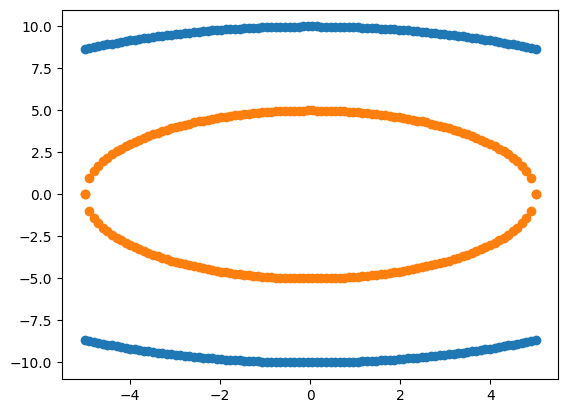

In [ ]:
plt.scatter(x,y)
plt.scatter(x1,y1)

plt.show()

In [ ]:
df1=pd.DataFrame(np.vstack([x,y]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([x1,y1]).T,columns=['X1','X2'])
df2['Y']=1
df=pd.concat([df1,df2],ignore_index=True)
df.head()

,X1,X2,Y
0,-5.00000,8.660254,0
1,-4.89899,8.717792,0
2,-4.79798,8.773790,0
3,-4.69697,8.828277,0
4,-4.59596,8.881281,0


In [ ]:
#Splitting features and target variable
X=df.drop('Y',axis=1)
y=df['Y']

In [ ]:
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [ ]:
#Splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
y_train

,Y
157,0
109,0
17,0
347,1
24,0
...,...
71,0
106,0
270,1
348,1


In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred=pred)

0.48333333333333334

**The accuracy using linear kernal is about 48% which is not optimal.So, now we will apply polynomial kernal.**




In [ ]:
#We need to find components for polynomial kernel x1,x2,x1*x2,x1_square,s2_sqaure
df['X1_square']=df['X1']**2
df['X2_square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,-5.00000,8.660254,0,25.000000,75.000000,-43.301270
1,-4.89899,8.717792,0,24.000102,75.999898,-42.708375
2,-4.79798,8.773790,0,23.020610,76.979390,-42.096467
3,-4.69697,8.828277,0,22.061524,77.938476,-41.466150
4,-4.59596,8.881281,0,21.122845,78.877155,-40.818009


In [ ]:
#Splitting features and target variable
X=df.drop('Y',axis=1)
y=df['Y']

In [ ]:
#Splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train

,X1,X2,X1_square,X2_square,X1*X2
157,-0.757576,-9.971263,0.573921,99.426079,7.553987
109,4.090909,-9.124936,16.735537,83.264463,-37.329285
17,-3.282828,9.445795,10.776962,89.223038,-31.008922
347,0.252525,-4.993619,0.063769,24.936231,-1.261015
24,-2.575758,9.662581,6.634527,93.365473,-24.888466
...,...,...,...,...,...
71,2.171717,9.761334,4.716355,95.283645,21.198857
106,4.393939,-8.982945,19.306703,80.693297,-39.470515
270,2.070707,4.551063,4.287828,20.712172,9.423918
348,0.151515,-4.997704,0.022957,24.977043,-0.757228


In [ ]:
import plotly.express as px
fig=px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

In [ ]:
fig=px.scatter_3d(df,x='X1_square',y='X2_square',z='X1*X2',color='Y')
fig.show()

In [ ]:
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred=pred)

1.0